In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 5.3 MB 27.6 MB/s 
     |████████████████████████████████| 1.3 MB 47.2 MB/s 
     |████████████████████████████████| 163 kB 41.8 MB/s 
     |████████████████████████████████| 7.6 MB 9.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9204c3cf1b3c5fd05cfa1e6bb1f5b73edccac1e55ad189b1af78bd528bb7b7ea
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
def save_feather(df, path="dummy.feather"):
    df = df.reset_index()
    df.to_feather(path)


def load_feather(path="dummy.feather"):
    df = pd.read_feather(path)
    df.set_index("index", inplace=True)
    df.index.name = None
    return df

In [6]:
%%time
df_vec = load_feather('/content/drive/MyDrive/123/df_vec.feather')

CPU times: user 3.72 s, sys: 7.83 s, total: 11.5 s
Wall time: 38.2 s


In [7]:
df_vec

,name_1,name_2,is_duplicate,name_1_vec,name_2_vec
1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,"[[0.47906685, -0.018307494, 0.8659092, 0.00746...","[[0.23672503, 0.20861588, 0.65479594, -0.33483..."
2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,"[[0.38661674, 0.28115824, 1.2294472, 0.1060093...","[[0.49608287, 0.34703, 1.1601655, 0.03730471, ..."
3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,"[[0.37602335, -0.31091407, 1.4761279, 0.348256...","[[-0.20695913, -0.3746192, 1.9735249, 0.609453..."
4,Powermax Rubber Factory,Co. One,0,"[[0.8159301, 0.19555168, 0.34510884, 0.0846300...","[[-0.4201645, -0.25693762, 1.7722572, 0.343720..."
5,Tress A/S,Longyou Industries Park Zhejiang,0,"[[0.3190953, -0.12776783, 2.0092118, 0.5302498...","[[0.6108755, -0.11318119, 0.8775512, 0.4646003..."
...,...,...,...,...,...
497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,"[[0.20780802, -0.6715281, 2.0279653, 0.7159105...","[[0.31035164, 0.71524155, 0.57812494, -0.10999..."
497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,"[[0.037580643, 0.21497345, 0.8158344, -0.01970...","[[-0.025509257, 0.025165878, 0.93238294, -0.06..."
497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,"[[0.36738318, 0.28829822, 0.6744457, 0.0161244...","[[0.33165696, 0.055881154, 0.7257623, -0.01566..."
497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,"[[-0.18972985, 0.10943819, 0.11614183, -0.1188...","[[-0.37692702, 0.52669895, 0.024338875, 0.0405..."


In [8]:
df_vec.shape[0]

497819

In [11]:
res_list = []
for index in tqdm(range(df_vec.shape[0])):
    res_list.append(cosine_similarity(df_vec['name_1_vec'].iloc[index][0].reshape(1, -1), df_vec['name_2_vec'].iloc[index][0].reshape(1, -1)))

100%|██████████| 497819/497819 [02:51<00:00, 2908.38it/s]


In [18]:
df_vec['cosine_similarity'] = res_list

In [12]:
len(res_list)

497819

In [13]:
np.mean(res_list)

0.643167

In [19]:
df_vec[df_vec['is_duplicate']==1]['cosine_similarity'].mean()

array([[0.7226154]], dtype=float32)

In [20]:
df_vec[df_vec['is_duplicate']==0]['cosine_similarity'].mean()

array([[0.6425743]], dtype=float32)

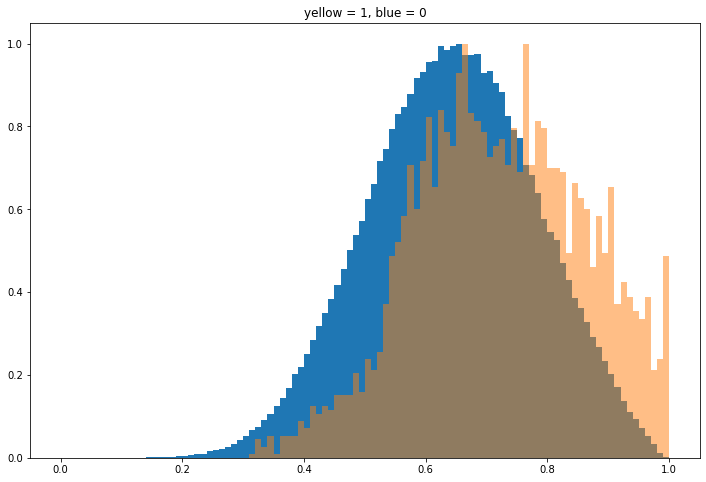

In [29]:
dist1 = df_vec[df_vec['is_duplicate']==0]['cosine_similarity']
dist2 = df_vec[df_vec['is_duplicate']==1]['cosine_similarity']

##computing the bin properties (same for both distributions)
num_bin = 100
bin_lims = np.linspace(0, 1, num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(dist1, bins=bin_lims)
hist2, _ = np.histogram(dist2, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax) = plt.subplots()
fig.set_size_inches(12, 8)

ax.bar(bin_centers, hist1b, width = bin_widths, align = 'center')
ax.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.5)
ax.set_title('yellow = 1, blue = 0')

plt.show()